In [11]:
# Import the module
import importlib
import IsovizPy as ja
import pandas as pd

In [45]:
# Load data and create the database
gtf_file = '/gpfs/commons/groups/knowles_lab/Karin/Leaflet-analysis-WD/TabulaSenis/genome_files/gencode.vM19/genes/genes.gtf'  
db = ja.create_db(gtf_file)

In [70]:
# After making changes to IsovizPy, reload it
importlib.reload(ja)

<module 'IsovizPy' from '/gpfs/commons/home/kisaev/Leaflet-private/src/visualization/IsovizPy.py'>

In [59]:
# Example data frame for junctions
data = {'junction_id': ["chr14_24493493_24494051_+", "chr14_24493493_24495429_+", "chr14_24493493_24495774_+", "chr14_24494069_24495429_+", "chr14_24495449_24495774_+"], 'Cluster': [1, 1, 1, 1, 1]}	
data = {'junction_id': ["chr17_48351191_48351690_+", "chr17_48351191_48351745_+"], 'Cluster': [1, 1]}	

splice_adata_var = pd.DataFrame(data)

In [60]:
# Convert junction_ids
splice_junctions = ja.convert_junction_ids(splice_adata_var)
print(splice_junctions)

[{'chrom': 'chr17', 'start': 48351191, 'end': 48351690, 'name': 'junction_1', 'strand': '+'}, {'chrom': 'chr17', 'start': 48351191, 'end': 48351745, 'name': 'junction_2', 'strand': '+'}]


In [61]:
# Check junction annotations
junction_annotation_results = ja.check_junction_annotation(splice_junctions, db)
print(junction_annotation_results)

100%|██████████| 2/2 [00:00<00:00, 119.14it/s]

[{'junction': 'chr17:48351191-48351690', 'strand': '+', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 0, 'position_off_3_prime': 1}, {'junction': 'chr17:48351191-48351745', 'strand': '+', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 0, 'position_off_3_prime': 1}]


In [62]:
# Fetch transcripts and determine plot boundaries
transcript_data = ja.fetch_transcripts_and_annotations(splice_junctions, db)
region_start, region_end = ja.determine_region_boundaries(splice_junctions)

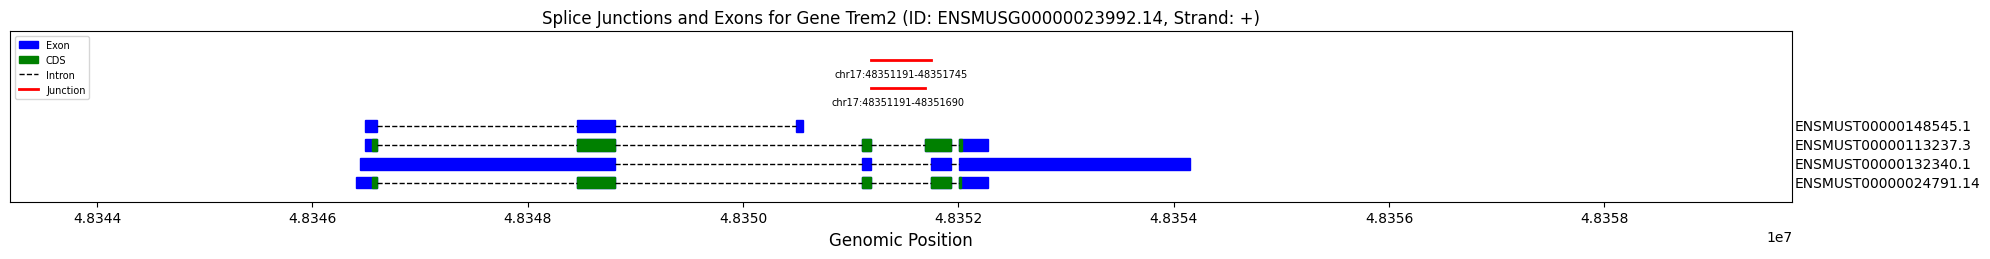

In [73]:
# Plot the annotations and splice junctions
ja.plot_exons_and_junctions(db, transcript_data, splice_junctions, region_start-7000, region_end+7000, base_width=20, trans_height=0.2, show_junc_lines=False, junc_color="red", filename="junction_plot.pdf")